# Exportiere Koordinatenwerte aus GeoJSON in CSV

Dieses Beispiel zeigt, wie ich ohne GIS-Softare die Werte für XY (WGS84) und EN (LV95) herauslesen kann.

**Informationen zu Geopandas findest Du unter diesem Link https://geopandas.org/docs/user_guide/io.html**


In [3]:
import pandas as pd
import numpy as np

import geopandas as gpd
import folium 

Lies das GeoJSON Inputfile ein und zeige es in einem einfachen Plot



<AxesSubplot:>

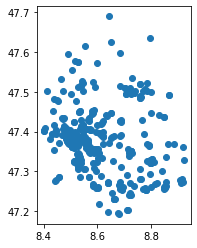

In [135]:
input_pflegeheime = r"//szh.loc/ssz/data/GIS/Sandbox/2021/pflegeheime_ktzh/nu geodata/ogd_pflegeheime_georef_4326.geojson"

gdf_pflegeheime_epsg4326 = gpd.read_file(input_pflegeheime)

gdf_pflegeheime_epsg4326 .plot()

Was ist das aktuelle CRS?

In [136]:
gdf_pflegeheime_epsg4326.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Schreibe die aktuellen XY-Werte des Geometrieobjekts in die Variable x und y.

In [137]:
gdf_pflegeheime_epsg4326["x"] = gdf_pflegeheime_epsg4326.centroid.x
gdf_pflegeheime_epsg4326["y"] = gdf_pflegeheime_epsg4326.centroid.y
gdf_pflegeheime_epsg4326

<ipython-input-137-95c8106cad2a>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_pflegeheime_epsg4326["x"] = gdf_pflegeheime_epsg4326.centroid.x
<ipython-input-137-95c8106cad2a>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_pflegeheime_epsg4326["y"] = gdf_pflegeheime_epsg4326.centroid.y


,Betrieb_Einheit,Strasse_Nummer,PLZ,Ort,Tel_nummer,Anzahl_bewilligte_Betten,Bezirk,ObjectId,geometry,x,y
0,GerAtrium Pfäffikon ZH,Hörnlistrasse 76,8330,Pfäffikon,044 953 43 42,97,Pfäffikon,1,POINT (8.79048 47.36720),8.790483,47.367202
1,Alters- und Pflegezentrum Rosengasse,Rosengasse 8,8332,Russikon,044 954 88 18,32,Pfäffikon,2,POINT (8.77453 47.39458),8.774527,47.394585
2,Almacasa,Dorfstrasse 3b,8484,Weisslingen,052 544 44 44,30,Pfäffikon,3,POINT (8.76437 47.42900),8.764371,47.428997
3,Oase Effretikon,Bietenholzstrasse 1,8307,Effretikon,052 354 54 54,33,Pfäffikon,4,POINT (8.68583 47.42273),8.685825,47.422728
4,Seniorenzentrum Zion,Ringwiesenstrasse 14,8600,Dübendorf,044 802 18 18,61,Uster,5,POINT (8.60566 47.39685),8.605664,47.396850
...,...,...,...,...,...,...,...,...,...,...,...
333,Alterszentrum Bruggwiesen - Haus A,Märtplatz 19,8307,Illnau-Effretikon,052 355 19 90,67,Pfäffikon,334,POINT (8.68518 47.42733),8.685180,47.427334
334,Alterszentrum Bruggwiesen - Haus B/C,Märtplatz 19,8307,Illnau-Effretikon,052 355 19 90,90,Pfäffikon,335,POINT (8.68518 47.42733),8.685180,47.427334
335,Alterszentrum Bruggwiesen - Dezentrale Wohngruppe,Schlimpergstrasse 2,8307,Illnau-Effretikon,052 355 19 90,8,Pfäffikon,336,POINT (8.68809 47.42996),8.688095,47.429958
336,Alters- und Pflegeheim Neuhof,Hittnauerstrasse 34,8330,Pfäffikon,044 950 14 83,23,Pfäffikon,337,POINT (8.79279 47.36433),8.792785,47.364331


Wandle nund den Geodatensatz von WGS84 zu LV95 um, teste ob es funktioniert hat und zeichne eine Karte:

In [145]:
#gdf_pflegeheime_epsg2056.crs = {'init': 'epsg:2056'}
# or
gdf_pflegeheime_epsg2056 = gdf_pflegeheime_epsg4326.to_crs({'init': 'epsg:2056'})


C:\Users\sszsim\AppData\Local\Continuum\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [146]:
gdf_pflegeheime_epsg2056.crs

<Projected CRS: EPSG:2056>
Name: CH1903+ / LV95
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Liechtenstein; Switzerland.
- bounds: (5.96, 45.82, 10.49, 47.81)
Coordinate Operation:
- name: Swiss Oblique Mercator 1995
- method: Hotine Oblique Mercator (variant B)
Datum: CH1903+
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

<AxesSubplot:>

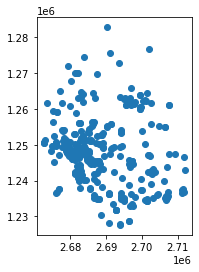

In [147]:
gdf_pflegeheime_epsg2056.plot()


Schreibe nun die x- und y-Werte in LV95 in eine eigene Spalte namens e (East, x-Wert in LV95) und n (North, y-Wert in LV95) hinein.

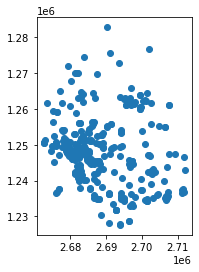

In [148]:
gdf_pflegeheime_epsg2056["e"] = gdf_pflegeheime_epsg2056.centroid.x
gdf_pflegeheime_epsg2056["n"] = gdf_pflegeheime_epsg2056.centroid.y

gdf_pflegeheime_epsg2056.plot();

In [149]:
gdf_pflegeheime_epsg2056

,Betrieb_Einheit,Strasse_Nummer,PLZ,Ort,Tel_nummer,Anzahl_bewilligte_Betten,Bezirk,ObjectId,geometry,x,y,e,n
0,GerAtrium Pfäffikon ZH,Hörnlistrasse 76,8330,Pfäffikon,044 953 43 42,97,Pfäffikon,1,POINT (2702108.843 1247141.451),8.790483,47.367202,2.702109e+06,1.247141e+06
1,Alters- und Pflegezentrum Rosengasse,Rosengasse 8,8332,Russikon,044 954 88 18,32,Pfäffikon,2,POINT (2700851.931 1250164.827),8.774527,47.394585,2.700852e+06,1.250165e+06
2,Almacasa,Dorfstrasse 3b,8484,Weisslingen,052 544 44 44,30,Pfäffikon,3,POINT (2700020.645 1253977.359),8.764371,47.428997,2.700021e+06,1.253977e+06
3,Oase Effretikon,Bietenholzstrasse 1,8307,Effretikon,052 354 54 54,33,Pfäffikon,4,POINT (2694106.338 1253183.279),8.685825,47.422728,2.694106e+06,1.253183e+06
4,Seniorenzentrum Zion,Ringwiesenstrasse 14,8600,Dübendorf,044 802 18 18,61,Uster,5,POINT (2688101.136 1250213.342),8.605664,47.396850,2.688101e+06,1.250213e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,Alterszentrum Bruggwiesen - Haus A,Märtplatz 19,8307,Illnau-Effretikon,052 355 19 90,67,Pfäffikon,334,POINT (2694049.489 1253694.500),8.685180,47.427334,2.694049e+06,1.253694e+06
334,Alterszentrum Bruggwiesen - Haus B/C,Märtplatz 19,8307,Illnau-Effretikon,052 355 19 90,90,Pfäffikon,335,POINT (2694049.489 1253694.500),8.685180,47.427334,2.694049e+06,1.253694e+06
335,Alterszentrum Bruggwiesen - Dezentrale Wohngruppe,Schlimpergstrasse 2,8307,Illnau-Effretikon,052 355 19 90,8,Pfäffikon,336,POINT (2694264.784 1253989.754),8.688095,47.429958,2.694265e+06,1.253990e+06
336,Alters- und Pflegeheim Neuhof,Hittnauerstrasse 34,8330,Pfäffikon,044 950 14 83,23,Pfäffikon,337,POINT (2702288.209 1246825.339),8.792785,47.364331,2.702288e+06,1.246825e+06


Exportiere die Geodaten in ein CSV heraus.

In [150]:
#for i in range(0,len(gdf_pflegeheime_epsg2056)):
#    gdf_pflegeheime_epsg2056.loc[i,'x'] = gdf_pflegeheime_epsg2056.geometry.centroid.x.iloc[i]
#    gdf_pflegeheime_epsg2056.loc[i,'y'] = gdf_pflegeheime_epsg2056.geometry.centroid.y.iloc[i]

In [151]:
path_file = r"//szh.loc/ssz/data/GIS/Sandbox/2021/pflegeheime_ktzh/geopandas/ogd_pflegeheime_geocoded_geopandas.csv"
gdf_pflegeheime_epsg2056.to_csv(path_file, sep=',', encoding='utf-8-sig', index=False, chunksize=10000) 


test

In [4]:

path_url = r"https://www.web.statistik.zh.ch/ogd/data/KANTON_ZUERICH_135.csv"

In [7]:
imp_data2betested = pd.read_csv(
    path_url, 
    sep=';',
   #usecols=[0,1,2,3,4,6],
   #names=['stationid','year','month','avgtemp','latitude','longitude','elevation','station','countryid','country'],
   #skiprows=1,
   # parse_dates=[0],
    parse_dates=True,
    date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )

In [9]:
imp_data2betested.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4729 entries, 0 to 4728
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BFS_NR           4729 non-null   int64  
 1   GEBIET_NAME      4729 non-null   object 
 2   THEMA_NAME       4729 non-null   object 
 3   SET_NAME         4729 non-null   object 
 4   SUBSET_NAME      4729 non-null   object 
 5   INDIKATOR_ID     4729 non-null   int64  
 6   INDIKATOR_NAME   4729 non-null   object 
 7   INDIKATOR_JAHR   4729 non-null   int64  
 8   INDIKATOR_VALUE  4727 non-null   float64
 9   EINHEIT_KURZ     4729 non-null   object 
 10  EINHEIT_LANG     4729 non-null   object 
 11  Unnamed: 11      0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 443.5+ KB


In [27]:
tst= imp_data2betested[['GEBIET_NAME','BFS_NR','INDIKATOR_JAHR','INDIKATOR_VALUE']]

tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4729 entries, 0 to 4728
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GEBIET_NAME      4729 non-null   object 
 1   BFS_NR           4729 non-null   int64  
 2   INDIKATOR_JAHR   4729 non-null   int64  
 3   INDIKATOR_VALUE  4727 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 147.9+ KB


In [29]:
#.agg(anz_betreungsplaetze_sk=('Anz_BP_SQ', 'sum'), anz_kinder_va_sk=('Anz_Kinder_VA', 'sum')) \

tst \
    .groupby(['GEBIET_NAME','BFS_NR','INDIKATOR_JAHR','INDIKATOR_VALUE']) \
    .agg(summe=('INDIKATOR_VALUE', 'sum') \
    .query('INDIKATOR_JAHR > 260') \
    .sort_values('INDIKATOR_JAHR', ascending=False) \
    .head(500)

SyntaxError: unexpected EOF while parsing (<ipython-input-29-bb1831fc7596>, line 8)